<a href="https://www.kaggle.com/code/tylerchi/concretestrengthpredictionfeb?scriptVersionId=120758565" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# !pip install -U --pre pycaret
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [2]:
train_df = pd.read_csv('C:/Users/tyler/Desktop/Kaggle/Concrete Strength/Concrete Data/train.csv')
test_df = pd.read_csv('C:/Users/tyler/Desktop/Kaggle/Concrete Strength/Concrete Data/test.csv')

In [3]:
train_df.head()

id  CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0   0            525.0               0.0              0.0           186.0   
1   1            143.0             169.0            143.0           191.0   
2   2            289.0             134.7              0.0           185.7   
3   3            304.0              76.0              0.0           228.0   
4   4            157.0             236.0              0.0           192.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        0.0                    1125.0   
1                        8.0                     967.0   
2                        0.0                    1075.0   
3                        0.0                     932.0   
4                        0.0                     935.4   

   FineAggregateComponent  AgeInDays  Strength  
0                   613.0          3     10.38  
1                   643.0         28     23.52  
2                   795.3         28     36.96  
3                   670.0        365     39.05  
4                   781.2         90     74.19

In [4]:
train_df.dtypes

id                             int64
CementComponent              float64
BlastFurnaceSlag             float64
FlyAshComponent              float64
WaterComponent               float64
SuperplasticizerComponent    float64
CoarseAggregateComponent     float64
FineAggregateComponent       float64
AgeInDays                      int64
Strength                     float64
dtype: object

In [5]:
train_df.nunique()

id                           5407
CementComponent               314
BlastFurnaceSlag              224
FlyAshComponent               177
WaterComponent                215
SuperplasticizerComponent     112
CoarseAggregateComponent      342
FineAggregateComponent        376
AgeInDays                      15
Strength                      843
dtype: int64

* All numeric data

In [6]:
train_df.drop('id', axis=1, inplace=True)

In [7]:
num_cols = [col for col in train_df.columns]

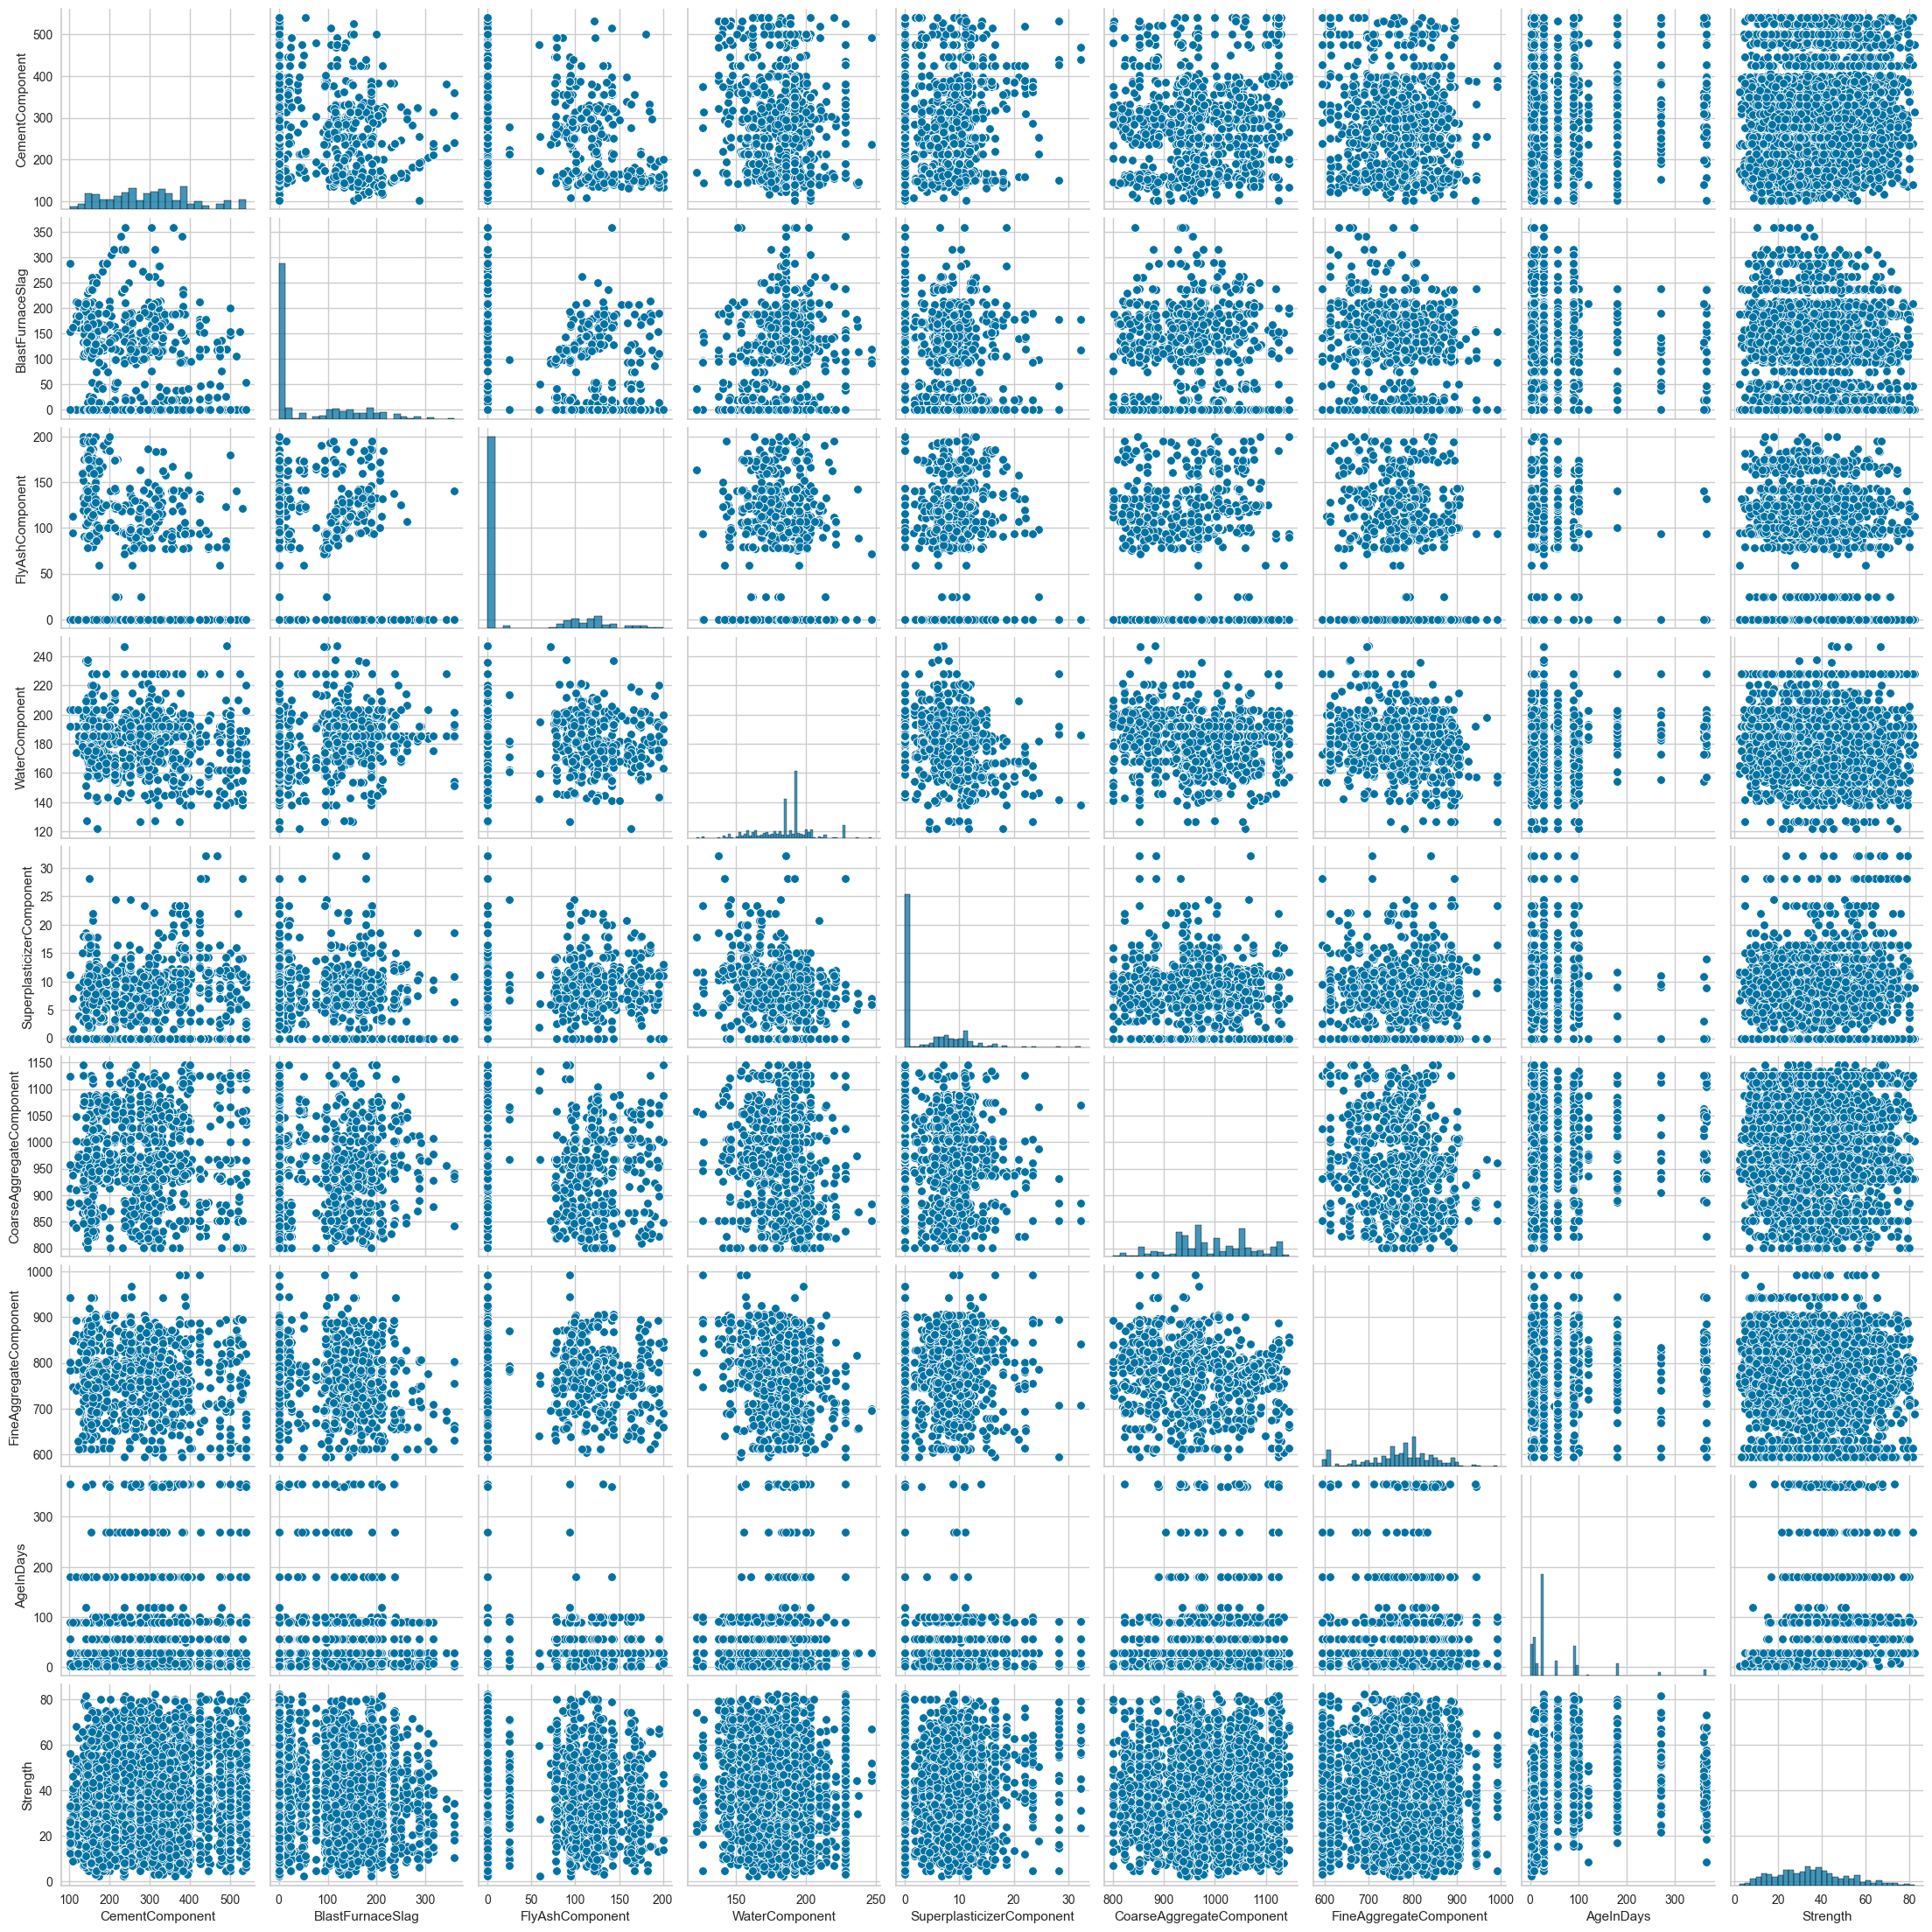

In [8]:
sns.pairplot(train_df)

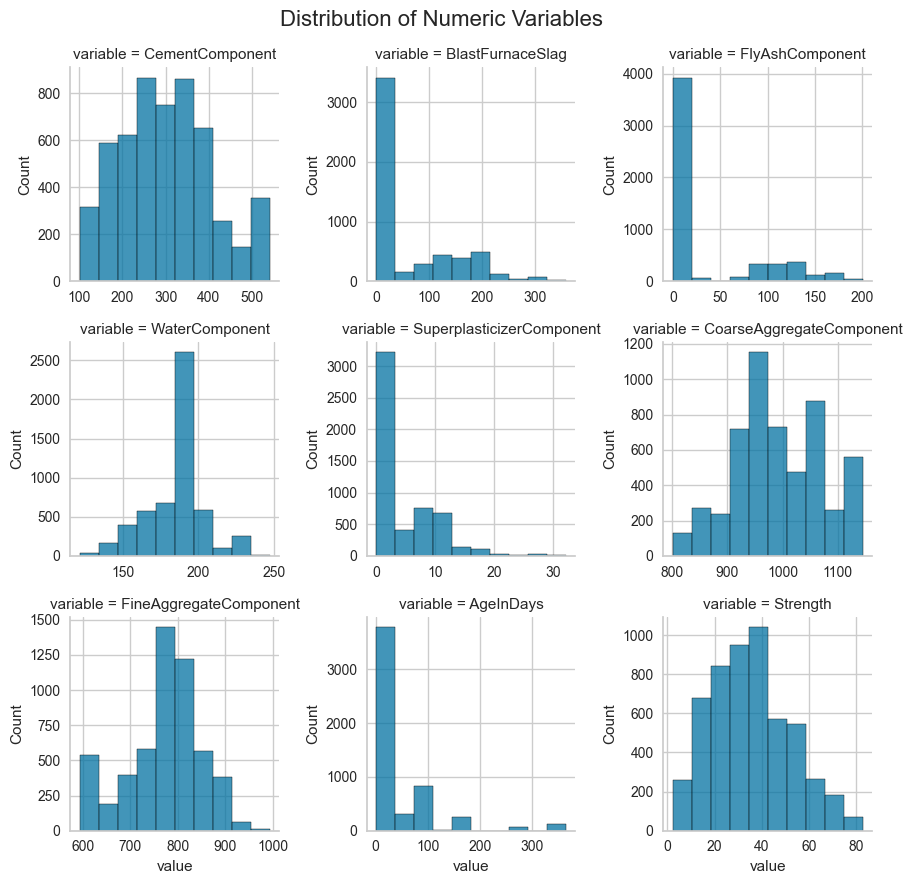

In [9]:
# Create a FacetGrid with one plot for each numeric variable
g = sns.FacetGrid(train_df[num_cols].melt(), col='variable', col_wrap=3, sharex=False, sharey=False)

# Map a histogram to each plot
g.map(sns.histplot, 'value', bins=10)

# Set the main title for the whole facet grid
g.fig.suptitle('Distribution of Numeric Variables', fontsize=16)

# Adjust the spacing between subplots
g.fig.tight_layout()

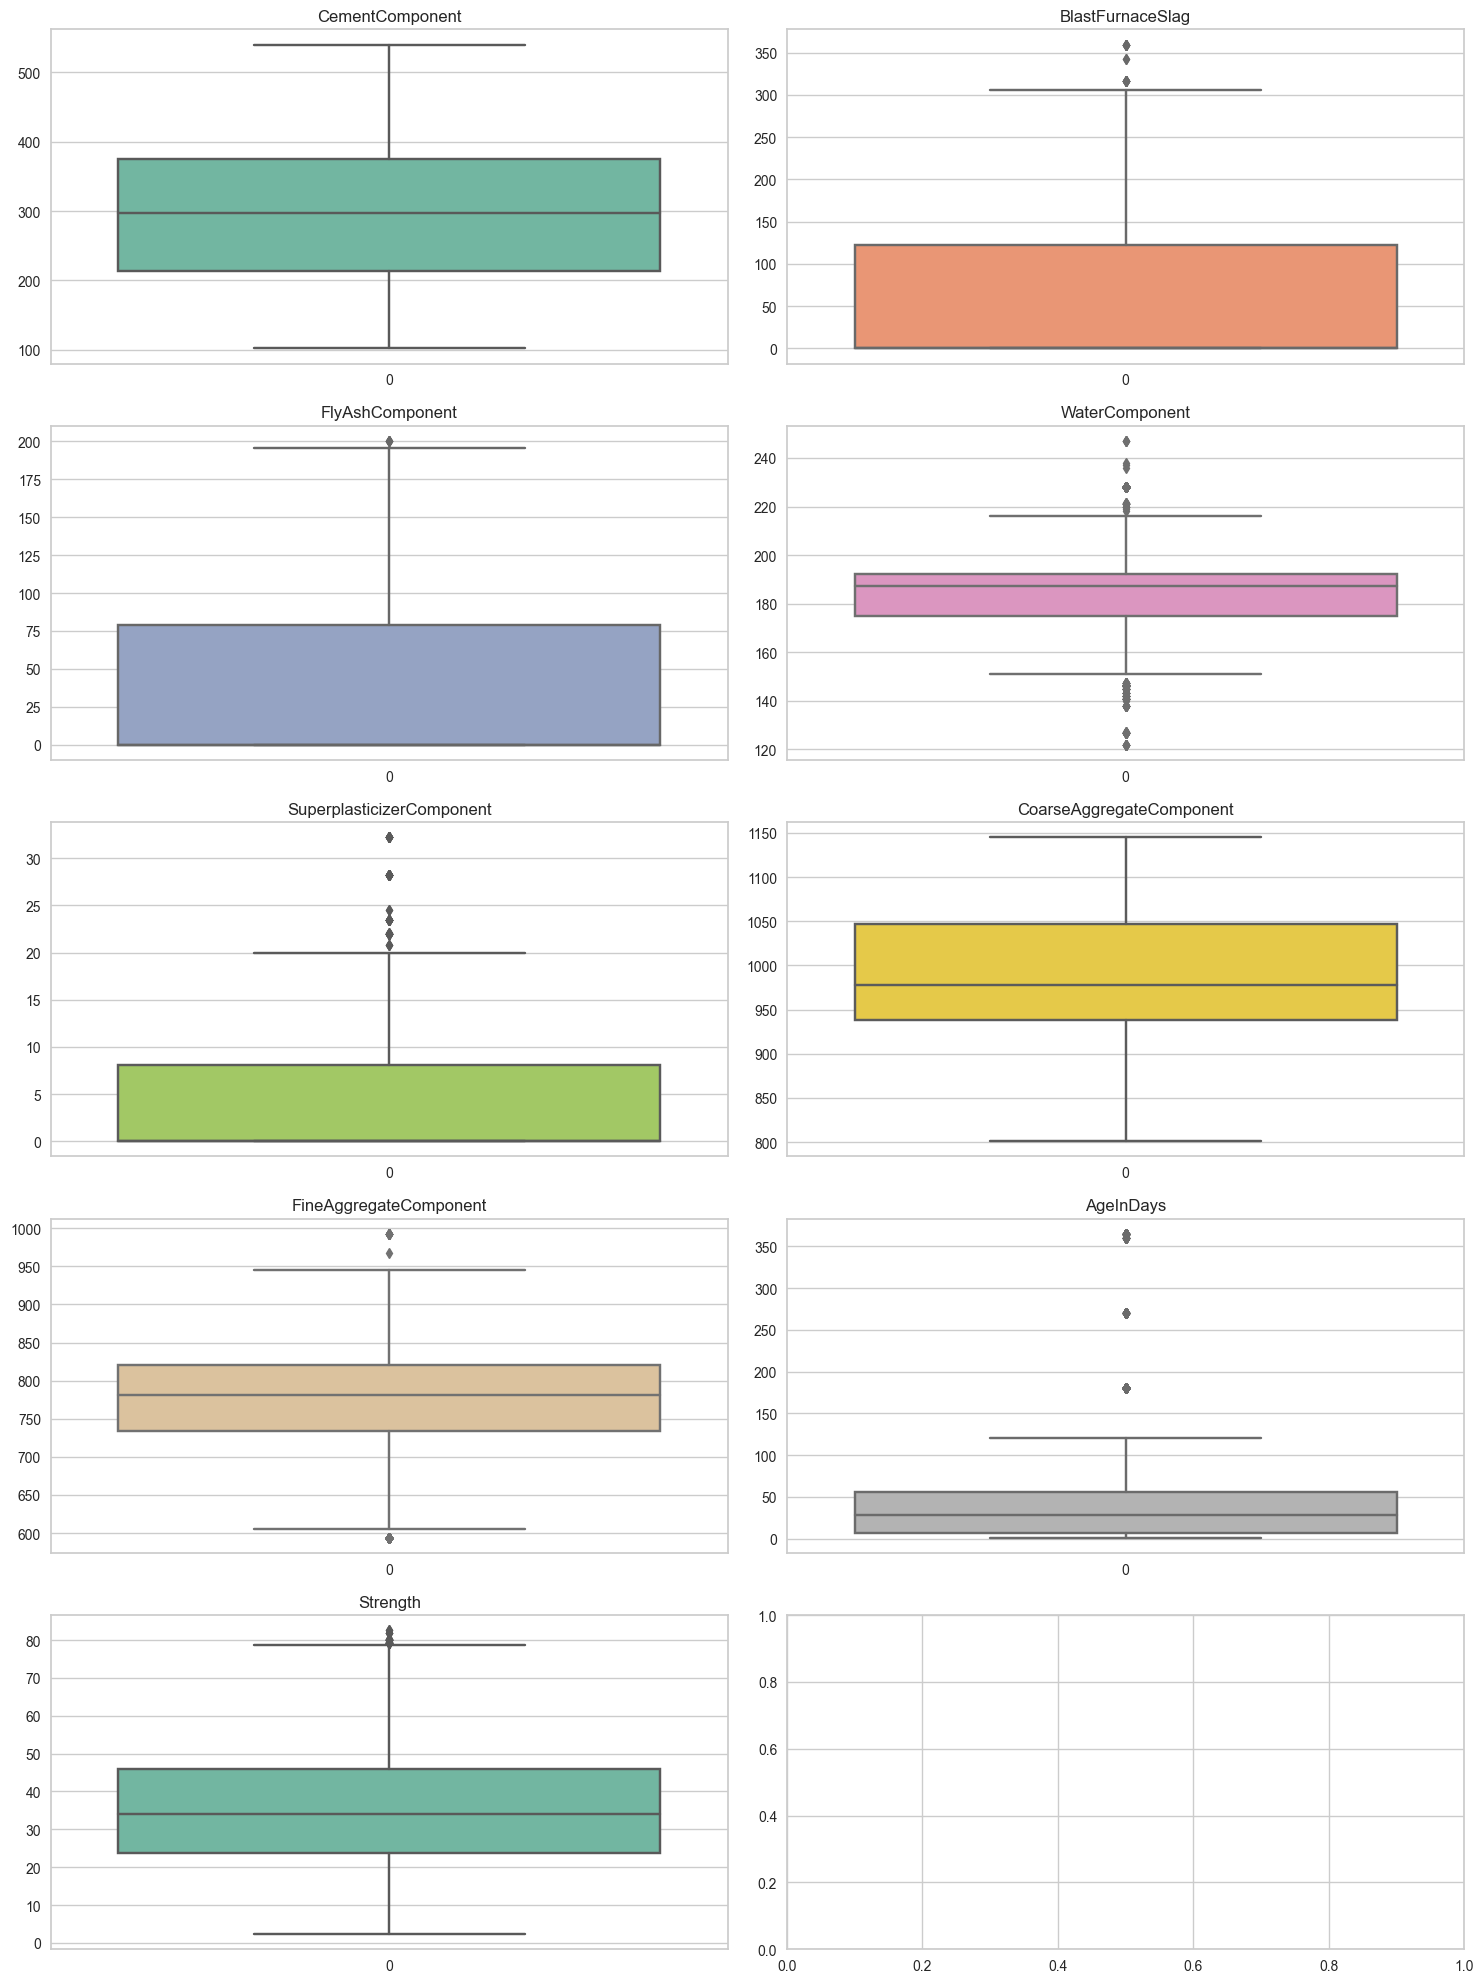

In [10]:
n_cols = 2
n_rows = (len(train_df.columns) + n_cols -1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

axes = axes.flatten()

palette = sns.color_palette("Set2", len(train_df.columns))

for i, col in enumerate(train_df.columns):
    sns.boxplot(data=train_df[col], ax=axes[i], color=palette[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

* Right skew BlastFurnaceSlag, FlyAshComponent, SuperplasticizerComponent, AgeInDays
* 

Compare train and test distribution

In [11]:
num_cols[:-1]

['CementComponent',
 'BlastFurnaceSlag',
 'FlyAshComponent',
 'WaterComponent',
 'SuperplasticizerComponent',
 'CoarseAggregateComponent',
 'FineAggregateComponent',
 'AgeInDays']

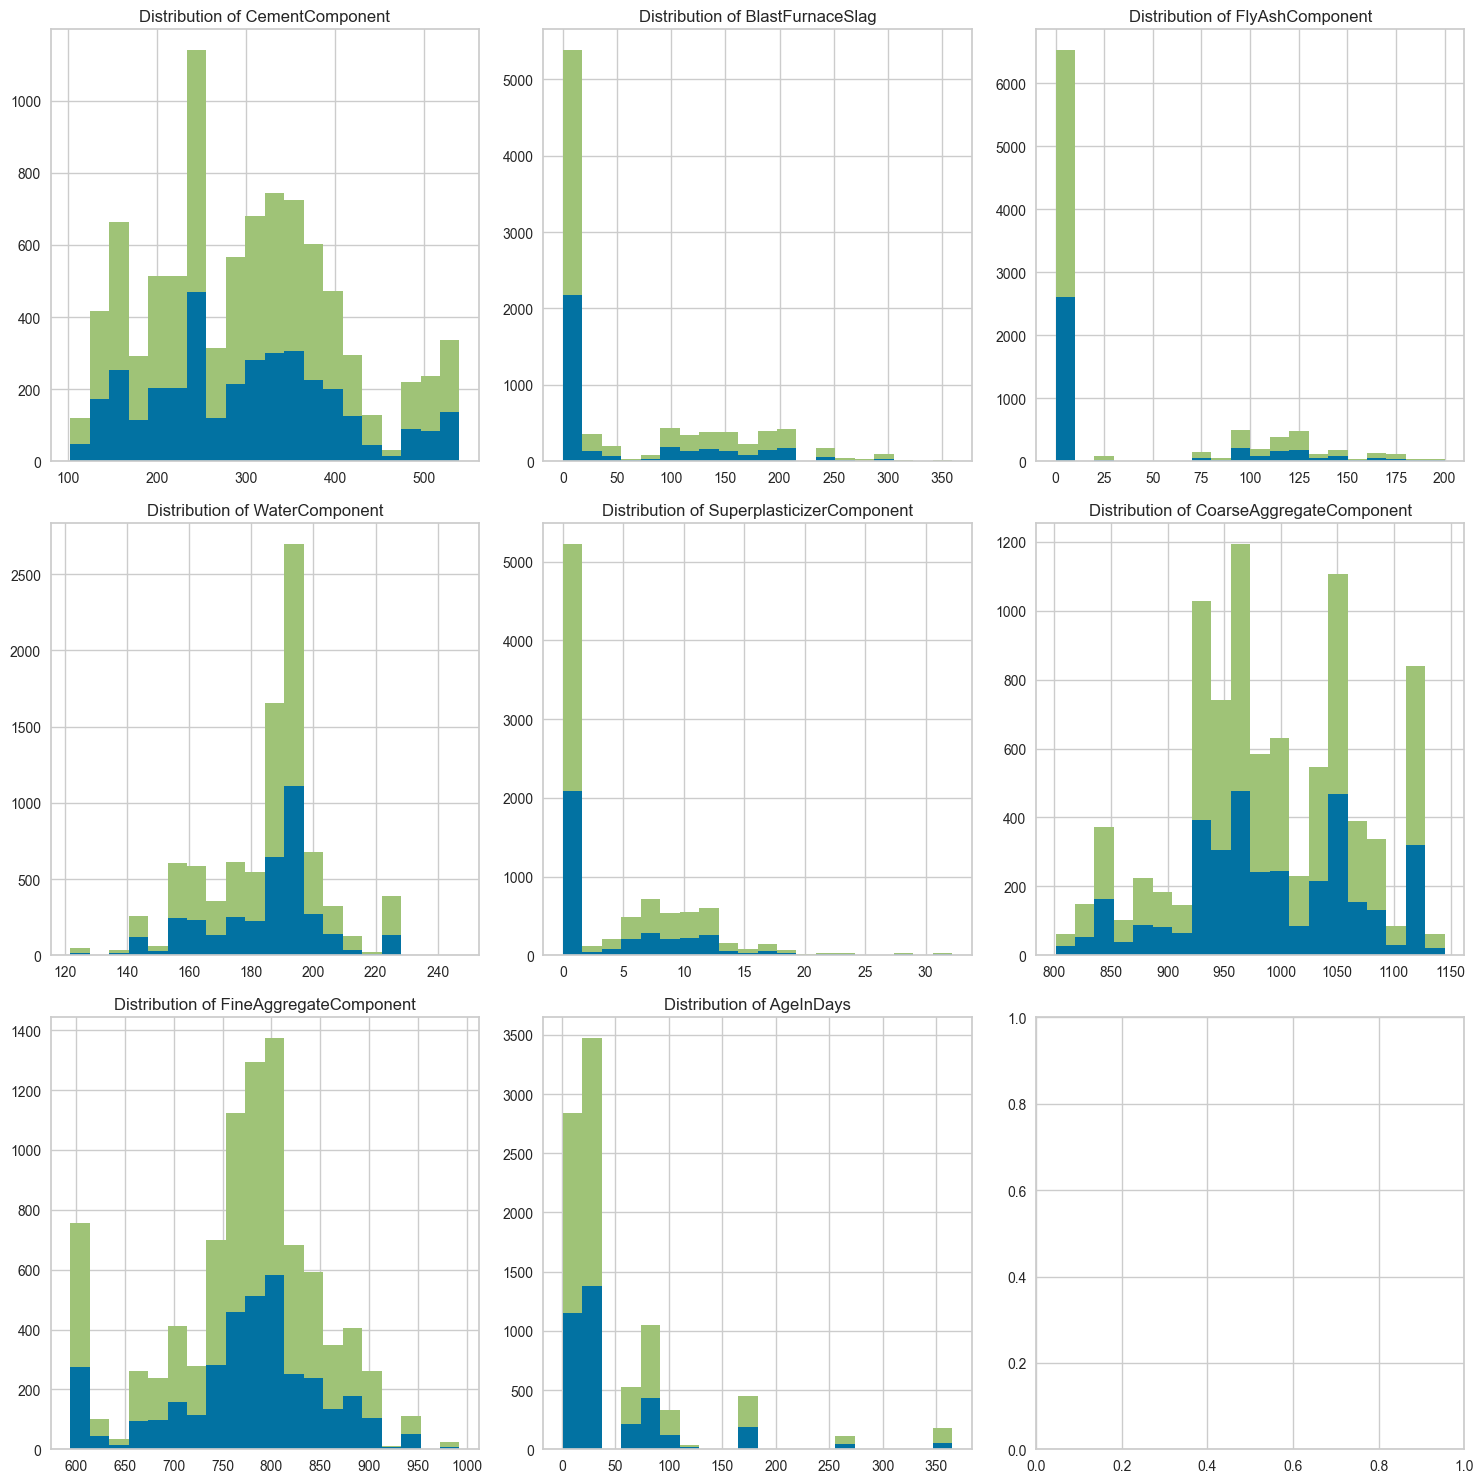

In [12]:
train_temp = train_df.copy()
train_temp['dataset'] = 'train'
test_temp = test_df.copy()
test_temp['dataset'] = 'test'
num_rows = 3
number_cols = 3

# Create the subplots
fig, axes = plt.subplots(num_rows,number_cols,figsize=(15, 5*3))

# Loop through each column and plot the distribution
for i, col in enumerate(num_cols[:-1]):
    row_idx = i // number_cols
    col_idx = i % number_cols
    ax = axes[row_idx, col_idx]
    ax.hist([test_df[col], train_df[col]], bins=20, label=['test','train'], stacked=True)
    ax.set_title(f'Distribution of {col}')

# Show the plot
plt.tight_layout()
plt.show()

# Previous Ideas

* standard scaler with gradient boosting regressor. GridSearchCV

In [13]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error

# X=train_df.drop(['Strength'], axis=1)
# y=train_df.Strength

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                       test_size = 0.20, random_state = 42)

# std_scaler = StandardScaler()

# X_train_scaled = std_scaler.fit_transform(X_train)
# X_test_scaled = std_scaler.transform(X_test)

# param_grid = {
#     'n_estimators': [1000],
#     'learning_rate': [0.01],
#     'max_depth': [2,5,10],
#     #'min_samples_split': [2, 5, 10],
#     #'min_samples_leaf': [1, 2, 4, 10],
#     #'subsample': [0.5, 0.8, 1.0],
#     'max_features': ['sqrt']
# }

# GBR = GradientBoostingRegressor(random_state=42)

# grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# grid_search.fit(X_train_scaled, y_train)

# print(f'Best hyperparameters: {grid_search.best_params_}')
# print(f'Mean squared error on validation set: {-grid_search.best_score_:.4f}')

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_scaled)
# mse = mean_squared_error(y_test, y_pred)

In [14]:
# fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,8))

# for i, col in enumerate(num_cols):
#     ax = axs[i]
#     ax.hist(train_df[col], bins=10)
#     ax.set_title(col)
    
# fig.suptitle('Distribution of Numeric Variables', fontsize=16)
# plt.tight_layout()

## Baseline no data transformation

In [15]:
exp1 = setup(data=train_df,target='Strength',session_id=123, profile=True)

IntProgress(value=0, description='Processing: ', max=3)

Initiated  . . . . . . . . . . . . . . . . . .            23:56:45
Status     . . . . . . . . . . . . . . . . . .  Preprocessing Data

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

Data Type
CementComponent                Numeric
BlastFurnaceSlag               Numeric
FlyAshComponent                Numeric
WaterComponent                 Numeric
SuperplasticizerComponent      Numeric
CoarseAggregateComponent       Numeric
FineAggregateComponent         Numeric
AgeInDays                  Categorical
Strength                         Label

In [ ]:
best_no_transformation = compare_models()

## Scale Data

In [ ]:
exp3 = setup(data=train_df,target='Strength',session_id=123, normalize=True)


In [ ]:
compare_models()

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
param_grid5 = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.1],
    'max_depth': [3, 4, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.5, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
gbr5 = create_model('gbr')
tuned_gbr5 = tune_model(gbr5, custom_grid = param_grid5)

In [ ]:
print(tuned_gbr5)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
evaluate_model(tuned_gbr5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

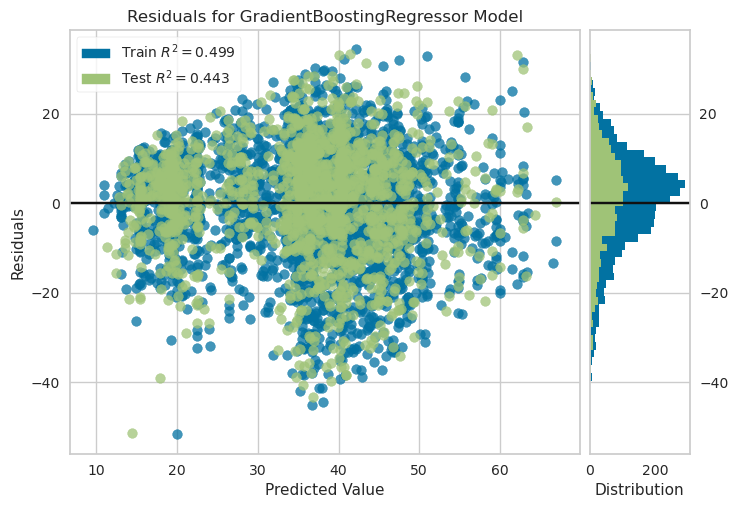

In [ ]:
plot_model(tuned_gbr5, plot='residuals')

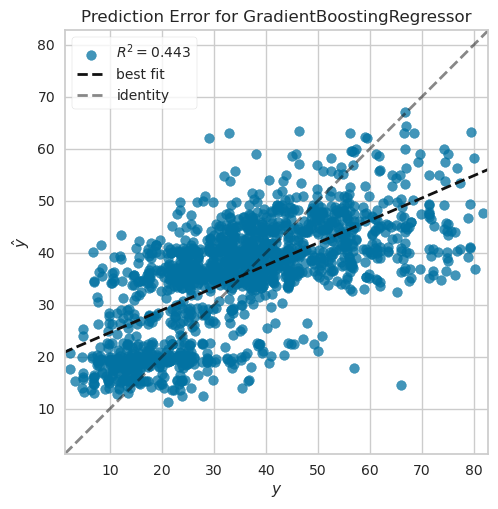

In [ ]:
plot_model(tuned_gbr5, plot='error')

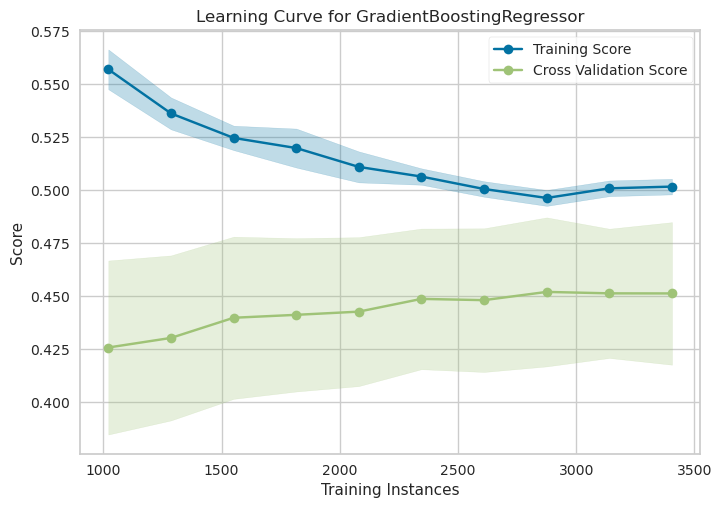

In [ ]:
plot_model(tuned_gbr5,plot='learning')

In [ ]:
gbr = create_model('gbr')
boosted_gbr = ensemble_model(gbr, method='Boosting')

In [ ]:
blender = blend_models(compare_models(n_select = 3))

## Improvements were seen using the original Concrete Dataset

In [ ]:
original = pd.read_csv('/kaggle/input/predict-concrete-strength/ConcreteStrengthData.csv')

In [ ]:
original.head()

CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0             540.0               0.0              0.0           162.0   
1             540.0               0.0              0.0           162.0   
2             332.5             142.5              0.0           228.0   
3             332.5             142.5              0.0           228.0   
4             198.6             132.4              0.0           192.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        2.5                    1040.0   
1                        2.5                    1055.0   
2                        0.0                     932.0   
3                        0.0                     932.0   
4                        0.0                     978.4   

   FineAggregateComponent  AgeInDays  Strength  
0                   676.0         28     79.99  
1                   676.0         28     61.89  
2                   594.0        270     40.27  
3                   594.0        365     41.05  
4                   825.5        360     44.30

In [ ]:
original['CementComponent'] = original['CementComponent ']
original.drop('CementComponent ',axis=1,inplace=True)
combined_df = pd.concat([train_df.copy(),original.copy()],ignore_index=True)

In [ ]:
combined_exp1 = setup(data=combined_df,target='Strength',session_id=123, normalize=True)

In [ ]:
combined_best = compare_models()

param_grid5 = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.1],
    'max_depth': [3, 4, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.5, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
combined_gbr1 = create_model('gbr')
tuned_combined_gbr1 = tune_model(combined_gbr1, custom_grid = param_grid5)

In [ ]:
print(tuned_combined_gbr1)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


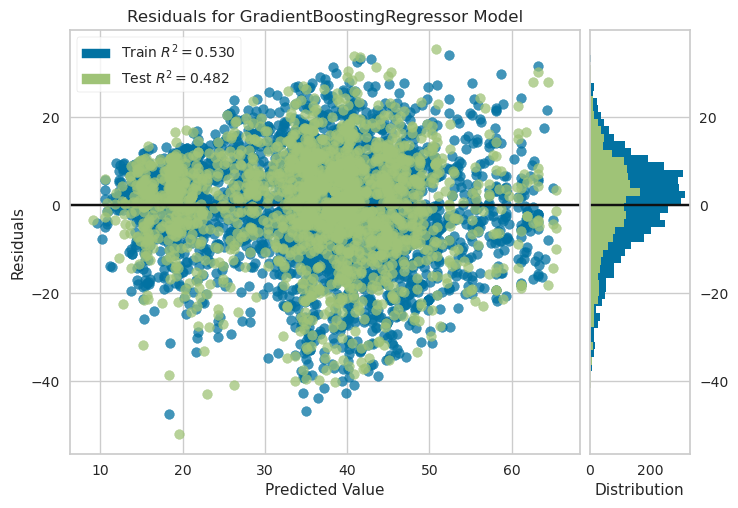

In [ ]:
plot_model(tuned_combined_gbr1, plot='residuals')

In [ ]:
test_df.tail()

id  CementComponent  BlastFurnaceSlag  FlyAshComponent  \
3600  9007            140.0             129.0            100.0   
3601  9008            281.0               0.0              0.0   
3602  9009            289.0             133.0              0.0   
3603  9010            469.0             117.2              0.0   
3604  9011            332.5             142.5              0.0   

      WaterComponent  SuperplasticizerComponent  CoarseAggregateComponent  \
3600           200.0                        7.0                     864.0   
3601           186.0                        0.0                    1104.0   
3602           194.0                        7.0                     924.0   
3603           137.8                       32.2                     852.1   
3604           228.0                        0.0                     932.0   

      FineAggregateComponent  AgeInDays  
3600                   753.0         28  
3601                   774.0         28  
3602                   760.0         28  
3603                   840.5          3  
3604                   594.0          7

In [ ]:
preds = predict_model(combined_best, data = test_df.drop('id',axis=1))

In [ ]:
preds

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0               166.1              75.4            163.8           173.8   
1               304.0               0.0              0.0           190.0   
2               225.0               0.0              0.0           185.0   
3               251.4               0.0            118.3           188.5   
4               144.0              15.0            195.0           176.0   
...               ...               ...              ...             ...   
3600            140.0             129.0            100.0           200.0   
3601            281.0               0.0              0.0           186.0   
3602            289.0             133.0              0.0           194.0   
3603            469.0             117.2              0.0           137.8   
3604            332.5             142.5              0.0           228.0   

      SuperplasticizerComponent  CoarseAggregateComponent  \
0                           4.6                    1007.2   
1                           0.0                     998.0   
2                           0.0                    1113.0   
3                           6.4                    1028.4   
4                           6.0                    1021.0   
...                         ...                       ...   
3600                        7.0                     864.0   
3601                        0.0                    1104.0   
3602                        7.0                     924.0   
3603                       32.2                     852.1   
3604                        0.0                     932.0   

      FineAggregateComponent  AgeInDays      Label  
0                      746.6         56  43.017007  
1                      801.0          7  19.092587  
2                      833.0         28  34.081888  
3                      757.7        100  46.071154  
4                      709.0         28  22.481344  
...                      ...        ...        ...  
3600                   753.0         28  32.229674  
3601                   774.0         28  36.116667  
3602                   760.0         28  40.026357  
3603                   840.5          3  35.227213  
3604                   594.0          7  21.455487  

[3605 rows x 9 columns]

In [ ]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e9/sample_submission.csv')
sample_submission.head(2)

id  Strength
0  5407    35.452
1  5408    35.452

In [ ]:
data = {'id': test_df.id, 'Strength': preds['Label']}

In [ ]:
new_df = pd.DataFrame(data)

In [ ]:
new_df.head()

id   Strength
0  5407  43.017007
1  5408  19.092587
2  5409  34.081888
3  5410  46.071154
4  5411  22.481344

In [ ]:
new_df.to_csv('submission.csv',index=False)